In [11]:
######## Packages ########
import numpy as np 
import re
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML 
import pandas as pd 

In [9]:
######## modify file as csv ########
with open('../code/3.3_duffing/expand_flow_1', 'r', newline='') as file, open('./file_out.csv', 'w', newline='') as fileout:
    text = re.sub(r's* ', ',', file.read())
    print(text, file=fileout)

In [14]:
######## read csv (use pandas) ########
df = pd.read_csv('./file_out.csv', header=None)

In [17]:
t = df.iloc[:,0].values
x = df.iloc[:,1].values 
v = df.iloc[:,2].values

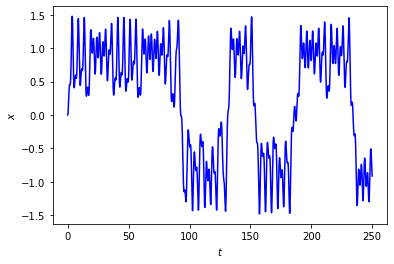

In [18]:
######## time response ########
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_xlabel(r"$t$"); ax.set_ylabel(r"$x$")
ax.plot(t, x, c="b")
plt.show()

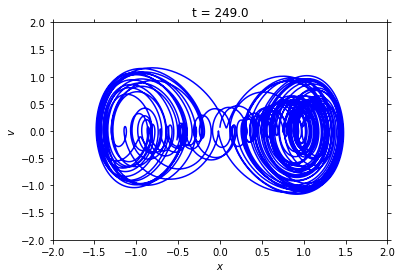

In [22]:
######## trajectory ########
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
dt = t[-1]/(len(t) - 1)

def update_func(frame):
    ax.clear()
    ax.set_xlabel(r"$x$"); ax.set_ylabel(r"$v$")
    ax.set_title("t = {}".format(round(frame*dt, 2)))
    ax.set_xlim([-2, 2]); ax.set_ylim([-2, 2])
    ax.plot(x[:frame], v[:frame], c="b")

ani = animation.FuncAnimation(fig, update_func, frames = range(0, len(t), int(1/dt)), interval=100)
ani.save("./3.3_duffing.gif", writer="imagemagick")
HTML(ani.to_jshtml())